In [ ]:
""" This code mounts the Google Drive to the Colab notebook environment to access and work with files stored in the drive."""

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
"""This code changes the current working directory to 'gdrive/My Drive/fruit/'.
 It assumes that you have a Google Drive account and have authorized Colab to access it. 
 This will allow you to access files in your Google Drive."""
 
import os
os.chdir('gdrive/My Drive/fruit/') 

In [ ]:
"""This code block imports necessary libraries like OpenCV and matplotlib.pyplot and defines a function called `create_training_data()` 
which reads image files from directories of fresh and rotten bananas and prepares the training data for machine learning models.
 `training_data` list is used to store the prepared training data. 
The `len()` function is used to print the total number of training data samples that are prepared by the `create_training_data()` function. """
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
training_data = []
DATADIR = "dataset/train"
IMG_SIZE = 50

CATEGORIES = ["freshbanana","rottenbanana"]
def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_training_data()

print(len(training_data))

100%|██████████| 2234/2234 [01:17<00:00, 28.67it/s] 

3815


In [ ]:
""" Priting length of training data """

print(len(training_data))

3815


In [ ]:
""" Shuffling the training data is a common practice in machine learning to ensure that the model does not learn patterns based on the order of the data. 
It randomizes the order of the data, which helps the model to generalize better and not overfit on the training data."""

import random

random.shuffle(training_data)

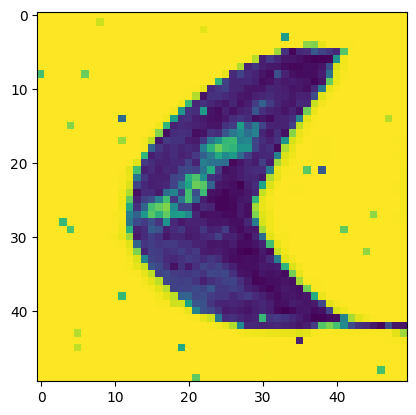

1


In [ ]:
"""The code displays an image of a banana and prints its corresponding label, which is either 0 or 1. 
The image and label are obtained from the `training_data` list, which was previously created by loading and preprocessing images from the `DATADIR` directory. 
The `imshow` function from `matplotlib.pyplot` is used to display the image, and `show` is used to display the plot."""
plt.imshow(training_data[50][0])
plt.show()
print(training_data[50][1])

In [ ]:
""" The code  creates a training dataset `X` by appending the features (reshaped image arrays) and labels of images from the `training_data` list.
 The features are first appended to a list `X`, and then converted to a numpy array and reshaped to have dimensions of (-1, IMG_SIZE, IMG_SIZE, 1). `-1` in this context means 
 that the size of that dimension is inferred from the size of the other dimensions and the total number of elements in the array.
 The `y` list contains the labels of the images."""
X = []
y = []
import numpy as np
for features,label in training_data:
    
    X.append(features)
    y.append(label)

print(X[3].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# print(X[3])

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [254]
   ...
   [254]
   [254]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [254]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [254]
   [255]]]]


In [ ]:
""" The above code saves the training data `X` and corresponding labels `y` in two separate pickle files (`XX.pickle` and `yy.pickle`)
 in the Google Drive directory `/content/gdrive/MyDrive/fruit/`."""
 
import pickle

pickle_out = open("/content/gdrive/MyDrive/fruit/XX.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/gdrive/MyDrive/fruit/yy.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("XX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yy.pickle","rb")
y = pickle.load(pickle_in)
print(len(X)+len(y))

7630
